## Diabetes Diagnosis Prediction in Python

This anaylysis used dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the analysis is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. All patients are females at least 21 years old of age. 

### Import and Data exploration

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, roc_curve, roc_auc_score

In [2]:
#Read the csv into DataFrame
df=pd.read_csv('diabetes.csv')

In [3]:
#Data exploration
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [5]:
#Descriptive summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
positive_outcome = df[df["Outcome"]==1].value_counts().sum()
perc_pos_outcome = (positive_outcome/(len(df)))*100
f"The number of positive outcome is {positive_outcome} and it takes up {perc_pos_outcome} percent of the outcome."

'The number of positive outcome is 268 and it takes up 34.89583333333333 percent of the outcome.'

From the above exploration, our data has 768 entries in 9 columns. There are no null values in the dataset implying no missing values. The features are in the right data types. The positive outcome takes up 34.9% od the total.

### Visualization

For our visualization, lets look at the correlation matrix of the dataset and then plot a heat map tp visualise the result. 

In [7]:
#Correlation of the data
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Heatmap

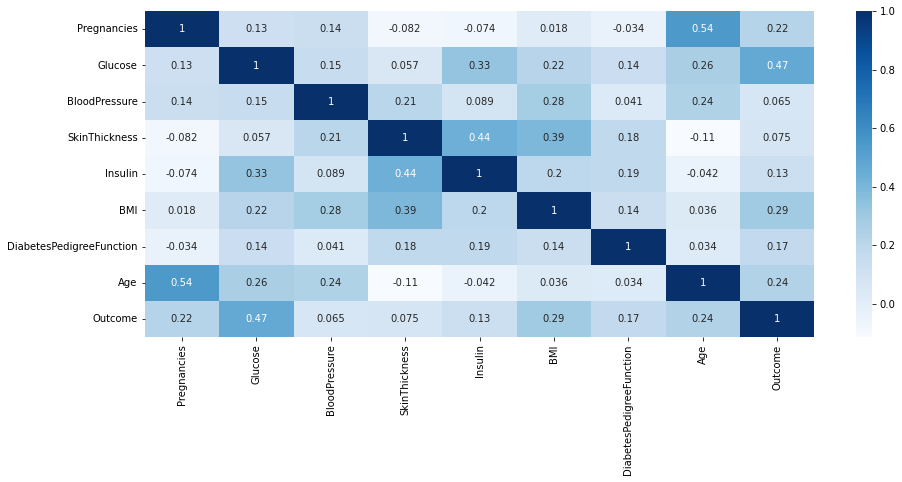

In [8]:
plt.figure(figsize=(15,6)) #Adjust figure size
sns.heatmap(corr, annot=True, cmap="Blues") #Plot the heatmap using seaborn
plt.show(); #Display the heatmap

#### Insight from heatmap

Age and Pregnancies have a strong positive correlation (0.544341). This suggests that as a person's age increases, the number of pregnancies tends to increase.
Age and SkinThickness have a negative correlation (-0.113970). This implies that as a person's age increases, the skin thickness tends to decrease.
Glucose and Insulin have a moderate positive correlation (0.331357). Higher glucose levels are associated with higher insulin levels.
Pregnancies and SkinThickness have a small negative correlation (-0.081672).
Glucose and Insulin (0.331357) have a moderate positive correlation.
DiabetesPedigreeFunction and Age have a very weak positive correlation (0.033561).

Outcome variable represents whether or not a person has diabetes.
Glucose has the highest positive correlation with Outcome (0.466581), indicating that higher glucose levels are associated with a higher likelihood of having diabetes.
BMI (0.292695) and Age (0.238356) also have moderate positive correlations with Outcome.
BloodPressure (0.065068) and SkinThickness (0.074752) have relatively weak positive correlations with Outcome.

#### Determining outcome value count

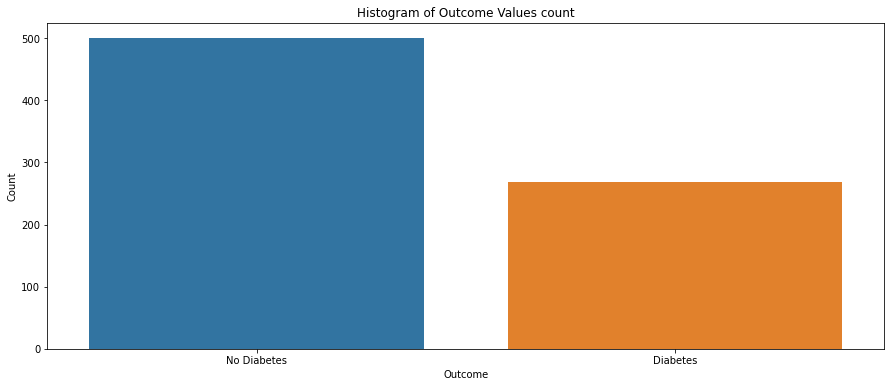

In [9]:
#Adjust figure size
plt.figure(figsize=(15,6))
#Plot the histogram of outcome valuecount
sns.countplot('Outcome', data=df) 
#Add labels, title and axes
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Histogram of Outcome Values count')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show(); #Display the heatmap

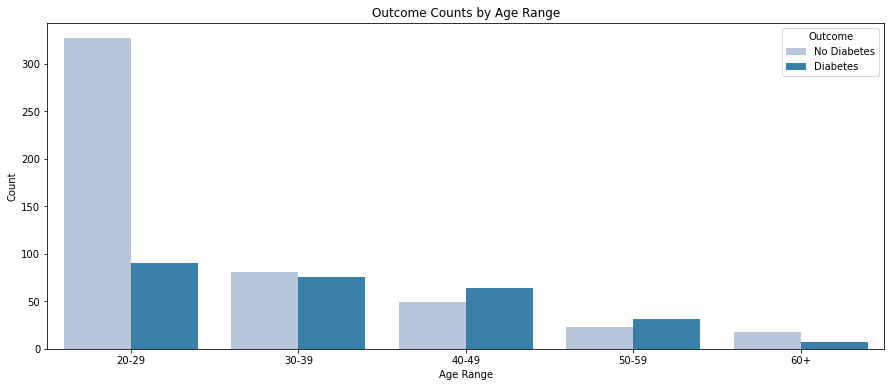

In [10]:
#Define age range and bins
age_range = ['20-29','30-39','40-49','50-59','60+']
age_bins = [20, 30, 40, 50, 60,70]

#Group the DataFrame bu age and outcome
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_range)

#Plot the bar chart
plt.figure(figsize=(15,6)) #Adjust figure size
sns.countplot(data=df, x='AgeGroup', hue='Outcome', palette='PuBu')

#Add title and axes
plt.title('Outcome Counts by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')

#Add legend
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])

#Show figure
plt.show();

Less than 40% of the patients are diabetic based on the outcome value counts.
There is high prevalence of no diabetes among the young age group of 20-29. There is an sharp decline in the prevalence as age increases towards 40 years and then the prevalence reduces gradually. This indicates that young women have a high chance of not having diabetes as compared to the older women.
While the trend for both 'diabetes' and 'no diabetes' decrease with age, the rate at which the no diabetes decrease is higher than the diabetes category.
However, majoprity of the patients belong to the young age group and that explains why they taek up the bigger portion of the outcome counts.

### Model building

#### Spliting Dataset

Now that our data is preprocessed and ready, lets split our data into the target and the features matrix for model building.

In [11]:
#Split the data into features and target
target = "Outcome"
X = df.drop(columns=[target,'AgeGroup'])
y=df[target]

#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#### Build model

Now that the data is split into training and testing data, lets build our model.

In [13]:
#Build and fit the model
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
#Make Predictions on the test data
y_pred = model.predict(X_test)

In [15]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(report)

Accuracy: 0.747
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### Insights

The model has an accuracy of 0.747 or 74.7%. This means that the model correctly predicts the class of roughly 74.7% of the total instances in the dataset.
The precision, recall, and F1-score values provide more detailed insights into how well the model performs for each class.
In this case, class 0 (negative class) has higher precision (0.81), recall(0.79), and F1-score(0.8) compared to class 1 (positive class). This means the model is better at classifying instances belonging to class 0.

### Communicate results
Now that the model is built and evaluated, its time to interprete the results and communicate them effectively.

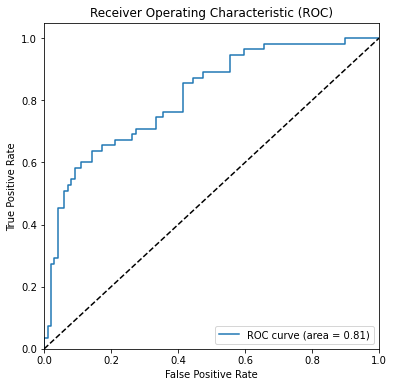

In [16]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a graphical representation of the model's performance at various classification thresholds. It plots the True Positive Rate  against the False Positive Rate at different threshold settings.
An AUC of 0.81 is considered a good performance. It means that our model has a high ability to correctly classify positive and negative instances.

In [17]:
# Obtain the feature coefficients and intercept
coefficients = model.coef_[0]  
intercept = model.intercept_[0]  

# List feature names 
feature_names = X.columns  

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}).set_index("Feature", drop=True)
sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(sorted_coefficients)

                          Coefficient
Feature                              
DiabetesPedigreeFunction     0.626907
BMI                          0.102610
Pregnancies                  0.064368
Age                          0.037098
Glucose                      0.034094
SkinThickness                0.003293
Insulin                     -0.001804
BloodPressure               -0.013880


Larger absolute coefficient values indicate stronger influence on the model's predictions.
Positive coefficients mean an increase in the feature's value is associated with a higher probability of the target being 1, and vice versa for negative coefficients.
The DiabetesPedigreeFunction has the highest coefficient value, implying that it has the greatest influence on the model prediction for a patient being diabetic. From research, DiabetesPedigreeFunction is a feature that quantifies the hereditary or genetic component of diabetes risk in individuals. Therefore, a person with history of diabetes in the family that is high DiabetesPedigreeFunction, would most likely be categorized to be at high risk of getting diabete by our model.
The second feature with high influence on the model prediction is the BMI. This means that patients with high BMI are at risk of being diagnosed with diabete.